<a href="https://colab.research.google.com/github/kenbaker-gif/ML-Projects/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [87]:
# Loading the data.
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [88]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB
None


In [89]:
# Statistical summary of the data.
print(data.describe())

               ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000    0.740000    0.000000    0.385000   
25%    123.000000    0.078960    0.000000    5.130000    0.000000    0.453000   
50%    244.000000    0.261690    0.000000    9.900000    0.000000    0.538000   
75%    377.000000    3.678220   12.500000   18.100000    0.000000    0.631000   
max    506.000000   73.534100  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean     6.265619   68.226426    3.709934    9.633634  409.279279   18.448048   
std      0.703952   28.1333

In [90]:
# Handling missing values
print(data.isnull().sum())

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


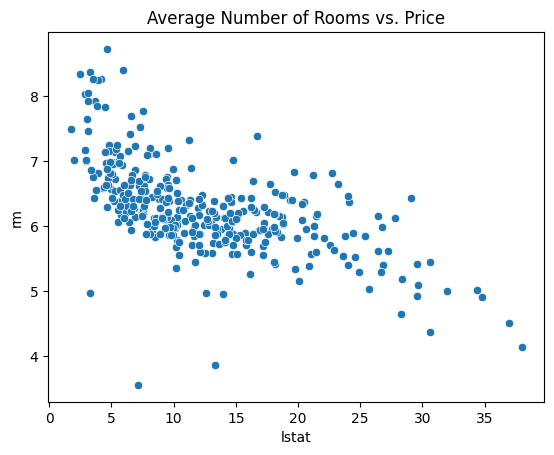

In [91]:
# Visualizing our data
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='lstat', y='rm', data=data)
plt.title('Average Number of Rooms vs. Price')
plt.show()

In [92]:
# Selecting features
X = data[['rm', 'lstat', 'crim']].values
y = data['medv'].values

In [94]:
# Checking for the length of the X and y.
print(f'Length of X: {len(X)}')
print(f'Length of y: {len(y)}')

Length of X: 333
Length of y: 333


In [95]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Normalizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
# Training the model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [98]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse_lr:.2f}')
print(f'Linear Regression R²: {r2_lr:.2f}')

Linear Regression MSE: 28.67
Linear Regression R²: 0.68


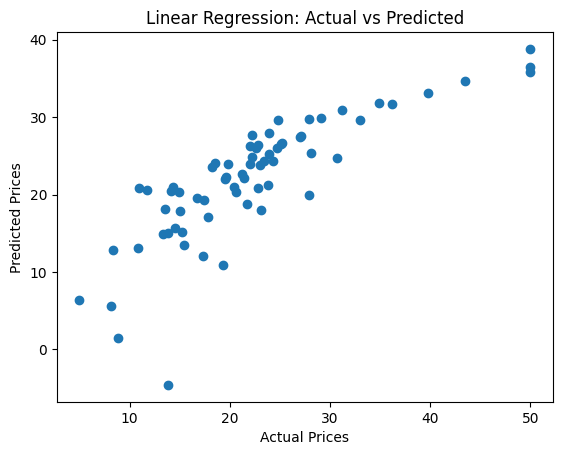

In [99]:
# Visualizing the data
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [100]:
# Load the test.csv
test_data = pd.read_csv('test.csv')
test_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [101]:
# Predict on test set
# Select only the 'rm' column from the test data and reshape it
test_data_rm = test_data[['rm', 'lstat', 'crim']].values

# Predict on the selected feature
predictions = lr_model.predict(test_data_rm)
print(f'Model Coefficients: {lr_model.coef_}')
print(f'Model Intercept: {lr_model.intercept_}')

Model Coefficients: [ 4.65019424 -0.68114623 -0.00617799]
Model Intercept: 2.136296346846848
